In [1]:
import pandas as pd
import pmdarima as pm
from sklearn.metrics import mean_absolute_percentage_error
%store -r date_list
%store -r cpi_list
%store -r ppi_list
%store -r unemployed_ratio_list
%store -r update_sp500

In [2]:
case_sp500 = pd.DataFrame()
case_sp500['date'] = date_list
case_sp500['cpi'] = cpi_list
case_sp500['ppi'] = ppi_list
case_sp500['unemployment_ratio'] = unemployed_ratio_list
case_sp500_update = pd.concat([case_sp500, update_sp500], axis=1).dropna()
case_sp500_update['date'] = pd.to_datetime(case_sp500_update['date'])
case_sp500_update = case_sp500_update.set_index('date')
find_sp500_case = case_sp500_update.resample('M').mean()
find_sp500_case_optimized = find_sp500_case['20090131':'20191231']
train=find_sp500_case_optimized[(find_sp500_case_optimized.index.get_level_values(0) >= '2009-01-31') & (find_sp500_case_optimized.index.get_level_values(0) <= '2015-08-31')]
test=find_sp500_case_optimized[(find_sp500_case_optimized.index.get_level_values(0) > '2015-08-31')]

In [3]:
model_sp500_optimized_without_variables = pm.auto_arima(train['Price'], 
                        D=1, 
                        test='adf',
                        m=12,
                        error_action='ignore',  
                        suppress_warnings=True, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=2.37 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=769.544, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=751.194, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=768.408, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=749.107, Time=0.54 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=747.048, Time=1.82 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=745.215, Time=0.28 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.38 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=1.83 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=745.079, Time=0.63 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=745.727, Time=0.63 sec
 ARIMA(2,1,0)(0,1,2)[12]             : AIC=747.000, Time=0.95 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=747.035, Time=1.56 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=745.08

In [4]:
model_sp500_optimized_without_variables.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   80
Model:             SARIMAX(1, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                -368.540
Date:                                 Fri, 10 Mar 2023   AIC                            745.079
Time:                                         15:14:57   BIC                            753.898
Sample:                                              0   HQIC                           748.569
                                                  - 80                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2156      0.133     -1.625      0.104      -0.476       0.044
ma.S.L12      -0.9522      0.277     -3.440      0.001      -1.495      -0.410
ma.S.L24       0.1701      0.174      0.979      0.328      -0.171       0.511
sigma2      2877.1091    928.451      3.099      0.002    1057.378    4696.840
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 2.42
Prob(Q):                              0.86   Prob(JB):                         0.30
Heteroskedasticity (H):               0.78   Skew:                            -0.39
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

0.047447401802316914

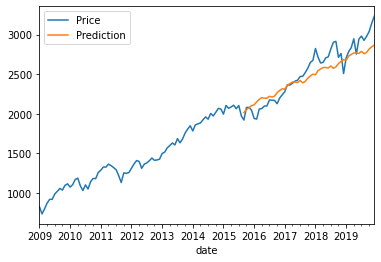

In [5]:
forecast=model_sp500_optimized_without_variables.predict(n_periods=len(test), return_conf_int=True)
arima_df_3 = pd.DataFrame(forecast[0], index = test.index, columns=['Prediction'])
pd.concat([find_sp500_case_optimized['Price'],arima_df_3],axis=1).plot()
mean_absolute_percentage_error(test.Price, arima_df_3['Prediction'])

In [6]:
m_data_arima_no_variable = arima_df_3.reset_index()
%store m_data_arima_no_variable

Stored 'm_data_arima_no_variable' (DataFrame)
